<font color = lightseagreen size=8><b>Tri par sélection</b></font>


---

---

<font color="lightseagreen" size="8">Première partie : tri itératif</font>

---

---

<font color="lightseagreen" size="6">get_idx_min : version iterative</font>





In [10]:
def get_idx_min(liste: list, pos: int) -> int :
    """
    Recherche l'indice du plus petit élément de liste en partant de la poisition pos

    :param liste: une liste d'entier (ou autre)
    :returns: idx est l'indice du plus petit élément de liste
    
    >>> get_idx_min([4, 3, 2, 1, 6, 8],0)
    3
    >>> get_idx_min([4, 3, 2, 1, 6, 8],4)
    4
    
    """
    min = pos
    for i in range(pos, len(liste)):
        if liste[i] < liste[min]:
            min = i

    return min
        


In [11]:
# vérifications :
liste = [4, 0, 2, 1, 6, 8]
assert get_idx_min(liste,0) ==  1
liste = [0, 3, 2, 1, 6, 8]
assert get_idx_min(liste,2) ==  3
liste = [0, 3, 2, 1, 6, -8]
assert get_idx_min(liste,4) ==  5


<font color="lightseagreen" size="6">Implémentez une version impérative du tri par sélection</font>

Avec cette fonction get_idx_min, nous pouvons maintenant implémenter le tri par sélection : tri_sel(lst)

Le principe :

+ pour pos allant de 0 à len(lst)-2 (jusqu'à l'avant denier)
> +   chercher le min dans la liste, en partant de l'indice pos
> + perutter les valeur des indice pos et pos_min


In [12]:
def tri_sel(lst) -> None :
    for pos in range(0, len(lst) - 2):
        min = get_idx_min(lst, pos)
        lst[pos], lst[min] = lst[min], lst[pos] 

# test 1:
lst = [0,-1, 3, 2]
tri_sel(lst)
print(lst)

# test 2:
lst = [0,-1, 3, 2,-2]
tri_sel(lst)
print(lst)

[-1, 0, 3, 2]
[-2, -1, 0, 2, 3]


---

---

<font color="lightseagreen" size="8">Deuxième partie : tri récursif</font>

---

---

<font color="lightseagreen" size="6">get_idx_min : version récursive sans slice</font>





### chercher l'indice du min en partant d'une position choisie

Comme toujours nous aurons besoin d'une fonction qui renvoie l'indice du min dans la liste, en partant d'une position choisie :

In [13]:
def get_idx_min(lst,pos=0) -> int :
    """
    :param lst: une list de python
    :param pos: indice de début de recherche
    renvoie l'indic du plus petit élément de la liste, en considérant les valeurs d'indice >= pos
    """
    if pos == len(lst) - 1:
        return pos
    else:
        min = get_idx_min(lst, pos + 1)
        if lst[pos] < lst[min]:
            return pos
        else:
            return min

In [14]:
assert get_idx_min([10,21,3,16,6]) == 2
assert get_idx_min([10,21,33,16,6]) == 4
assert get_idx_min([10,21,33,16,86]) == 0
assert get_idx_min([10,21,33,16,86],2) == 3

le tri utilise cette fonction, pour effectuer des permutations successives :


<font color="lightseagreen" size="6">Implémentez une version récursive du tri par sélection</font>

Avec cette fonction get_idx_min, nous pouvons maintenant implémenter le tri par sélection : tri_sel_recursif(lst)

Le schéma ci-dessous illustre le principe, dans le cas général : le tableau est trié jusqu'à l'indice idx exclus (au départ, idx est égal à 0) et on va placer le bon élément à l'indice $idx$ :



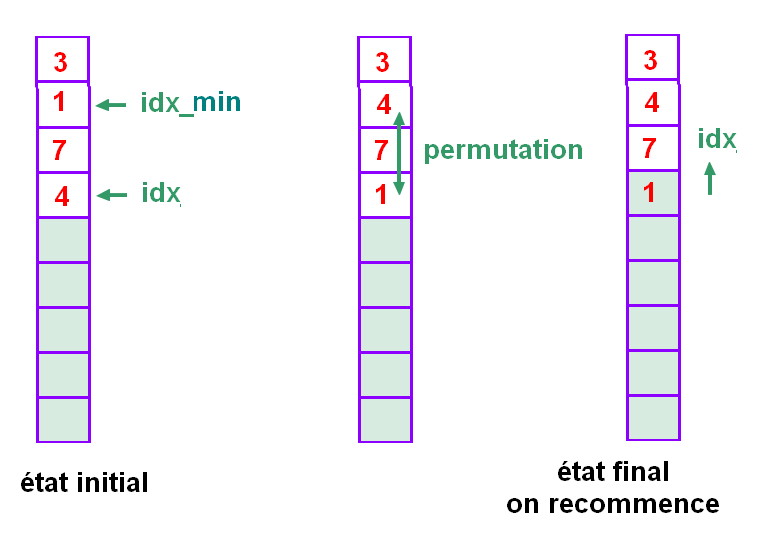

La fonction ne renvoie rien, elle modifie lst.

A chaque appel :

+ on cherche la position idx_min du minimum dans la liste **en partant d'un indice idx**
+ on permutte les valeur d'indices idx et idx_min

On doit poursuivre (récursivement) tant qu'il y a au moins 2 éléments dans la liste.

In [15]:
# et le tri lui même :
def tri_sel_recursif(lst, idx=0) -> None :
    if idx == len(lst) - 2:
        pass # modifie la liste en entrée, rien a renvoyer
    else:
        min = get_idx_min(lst, idx)
        lst[idx], lst[min] = lst[min], lst[idx] 
        tri_sel_recursif(lst, idx + 1)

# test 1:
lst = [0,-1, 3, 2]
tri_sel_recursif(lst)
print(lst)

# test 2:
lst = [0,-1, 3, 2,-2]
tri_sel_recursif(lst)
print(lst)

[-1, 0, 3, 2]
[-2, -1, 0, 2, 3]


**Notez bien que la fonction ne renvoie rien, mais elle modifie la liste donnée en entrée. Il n'y a donc pas lieu de renvoyer une valeur, et ceci s'appliquera aussi bien au cas de base, qu'au cas général**

---

---

<font color="lightseagreen" size="8">Troisième partie : trier une pile</font>

---

---

# une version qui utilise la hauteur de la pile (mais il faut l'implémenter) 

## On ajoute un attribut hauteur (initialisé à 0 dans le constructeur et tenu à jour dans empile et depile)


In [16]:
class Pile :
    def __init__(self):
        self.lst=[]
        self.hauteur=0

    def estVide(self):
        return self.lst==[]

    def empile(self,x) :
        self.lst.append(x)
        self.hauteur+=1

    def depile(self) :
        self.hauteur-=1
        return self.lst.pop()

    def donne_hauteur(self) :
        return self.hauteur

    def get(self):
        return self.lst
    
    def vide_dans(self,other) :
        while not self.estVide() : other.empile(self.depile()) 

    def __str__(self) : return str(self.lst)+' <-'

# principe du tri par sélection récursif d'une pile

principe : 
> au départ, on doit trier tout le table (on part de la position pos = 0)
> à chaque appel : on ne tri que le dessus, on laisse en place la partie
déja triée : de 0 à pos. 
> On s'arrête si la hauteur est égale à pos-1 car dans ce cas il n'y a rien à trier.

**Là encore, souvenez vous que la fonction ne renvoie rien mais modifie la pile.**



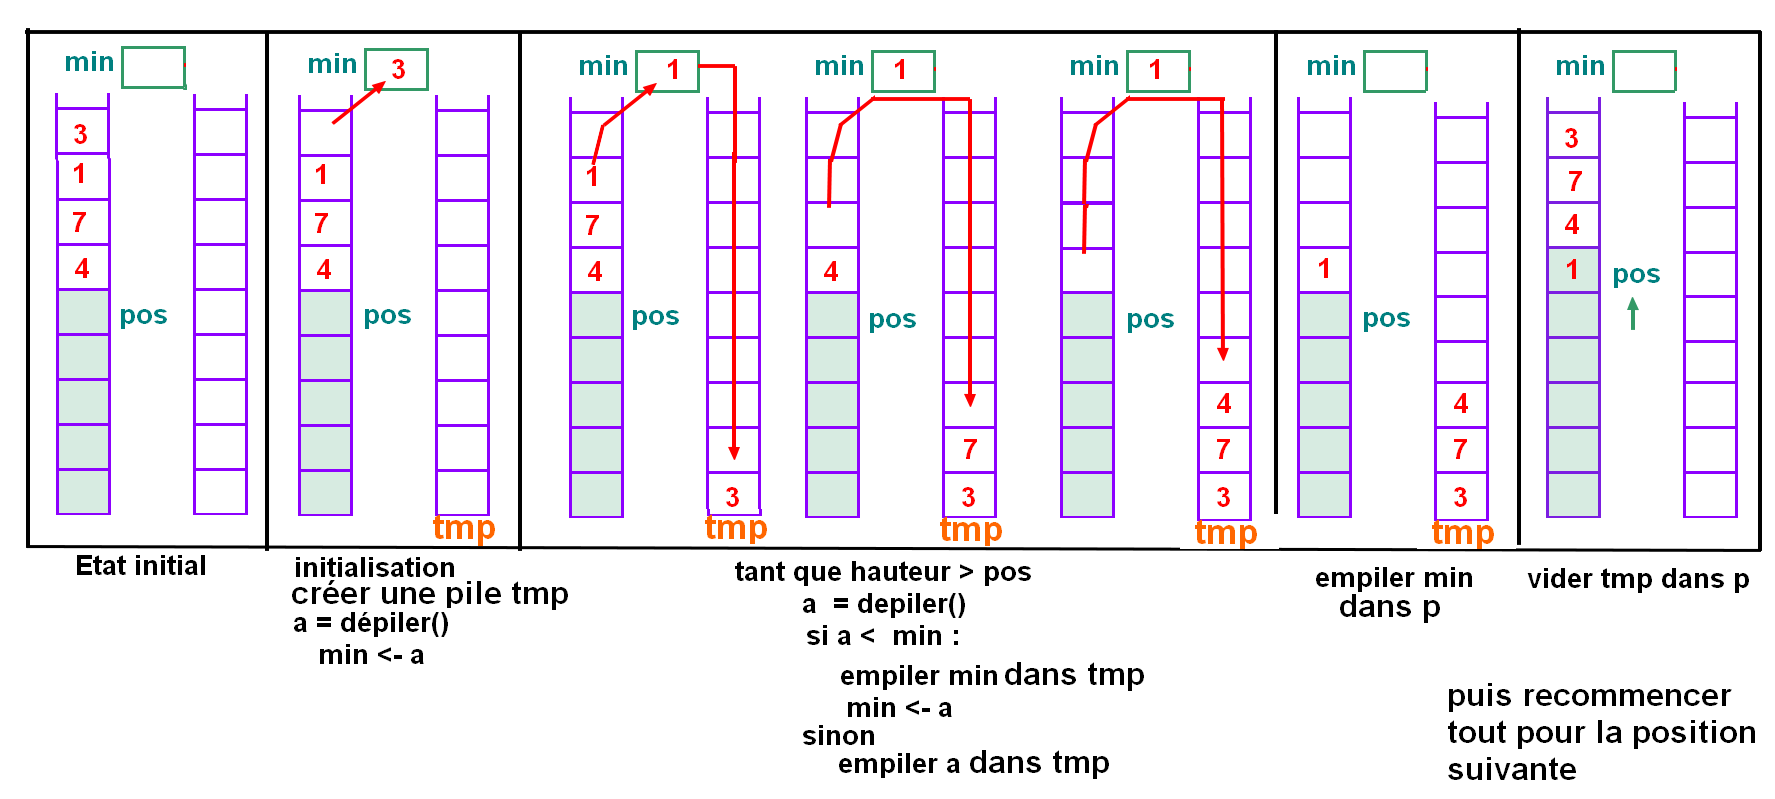

In [17]:
def tri_sel_recursif(p,pos=0) :
    '''
    :param p: une pile
    :param pos:l'indice du dernier déjà en place (par défaut 0)
    '''
    if pos == p.hauteur:
        return pos
    else:
        tmp = Pile()
        a = p.depile()
        min = a
        
        while p.hauteur > pos:
            a = p.depile()
            if a < min:
                tmp.empile(min)
            else:
                tmp.empile(a)
                
        p.empile(min)
        
        tmp.vide_dans(p)
            
        tri_sel_recursif(p, pos+1)

In [18]:
# vérification
# tri d'une pile vide :
p=Pile()
print("pile de départ :",p)
tri_sel_recursif(p)
print('pile triée:',p)

# tri d'une pile quelconque :
p=Pile()
p.empile(0)
p.empile(-1)
p.empile(4)
p.empile(2)

print("pile de départ :",p)
tri_sel_recursif(p )
print("pile triée:",p)

pile de départ : [] <-
pile triée: [] <-
pile de départ : [0, -1, 4, 2] <-
pile triée: [2, 4, 4, 4] <-
